# 感知机分类

以sklearn库中的鸢尾花iris数据集为例，利用感知机实现二分类。
取出数据集中的前两个特征 sepal length花萼长度和sepal width花萼宽度 作为输入。

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [9]:
#df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
#df #显示所有数据
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [10]:
df.label.value_counts() #计算每个不同的值（类）在该列中的个数，默认按降序排列。

0    50
1    50
2    50
Name: label, dtype: int64

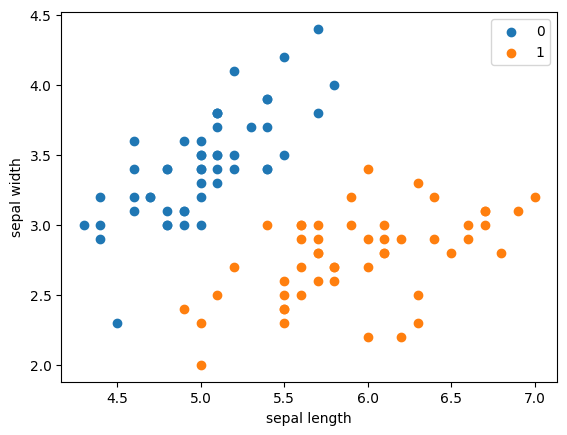

In [12]:
plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'], label='0')
plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [13]:
data = np.array(df.iloc[:100, [0, 1, -1]])
##datatext=df.iloc[:100,[0,2,-1]]


<p>关于iloc的理解：<p>
<p>在上例中：iloc[:100,[0,1,-1]]中，:100 中冒号前面是表示开始，当开始为空时，表示从第一个开始。可以看到：<p>
<p>
XText ytext 与 X y 的区别；
<p>
:100整个表示列，后面的[0,1,-1]整体表示行。
<p>
-1表示最后一行。index不算在内。
<p>
所以0表示的是index后的第一行
<p>
而且：0，1，-1 表示三行
<p>
同时，可以得到：行和列的切片操作是可以一样的。
<p>

In [14]:
X, y = data[:,:-1], data[:,-1]

In [15]:
XText,ytext = data[4:19,:-1],data[19:,-1]

In [16]:
y = np.array([1 if i == 1 else -1 for i in y])

## 感知机算法

In [17]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [18]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

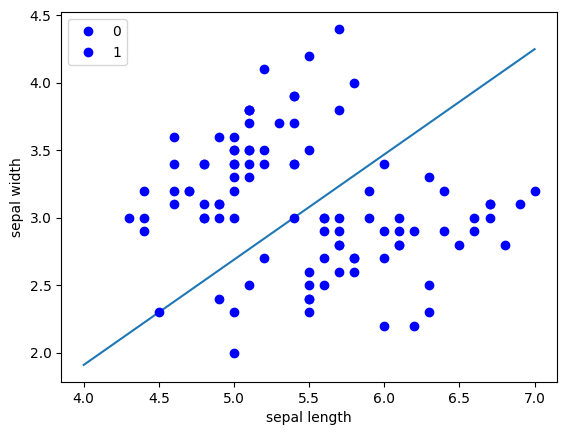

In [22]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo',  label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

In [ ]:
import sklearn
from sklearn.linear_model import Perceptron

In [ ]:
sklearn.__version__

'1.1.3'

In [ ]:
clf = Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X, y)

Perceptron(fit_intercept=False, shuffle=False)

In [ ]:
# 权向量 
print(clf.coef_)

[[ 16.3 -24.2]]


In [ ]:
# 截距/偏置项
print(clf.intercept_)

[0.]


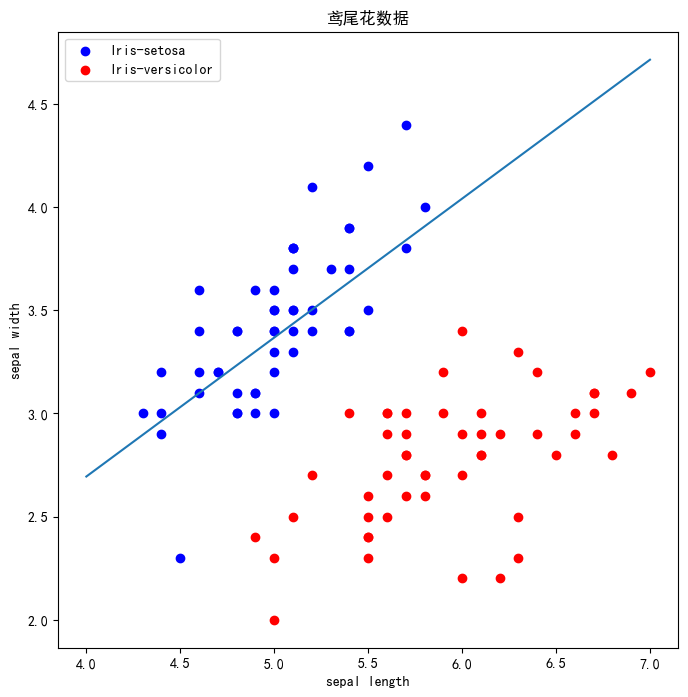

In [ ]:
# 画布大小
plt.figure(figsize=(8, 8))

# 中文标题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花数据')

plt.scatter(
    data[:50, 0],
    data[:50, 1],
    c='b',
    label='Iris-setosa',
)
plt.scatter(data[50:100, 0],
            data[50:100, 1],
            c='red',
            label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0] * x_ponits + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

所有样本都被正确分类。